In [9]:
import json
import pandas as pd

# load data/Output/jsons/Demographics.json
demographics = pd.read_json('../data/Output/jsons/Demographics.json').set_index('ID')
# load data/Output/jsons/glucose.json
glucose = json.load(open('../data/Output/jsons/glucose.json'))

In [13]:
# make list of prediabetic patients and non-prediabetic patients based on HbA1c
prediabetic_patients = []
non_prediabetic_patients = []
for patient in demographics.index:
    # get the patient's HbA1c value
    hba1c = demographics.loc[patient]['HbA1c']
    # check if the patient is prediabetic
    if hba1c >= 5.7 and hba1c < 6.5:
        prediabetic_patients.append(patient)
    else:
        non_prediabetic_patients.append(patient)

In [16]:
# make list of male and female patients
male_list = []
female_list = []
for patient in demographics.index:
    # get the patient's
    gender = demographics.loc[patient]["Gender"]
    if gender == "MALE":
        male_list.append(patient)
    else:
        female_list.append(patient)


In [14]:
prediabetic_patients

[13, 3, 4, 5, 6, 10, 9, 11]

In [15]:
non_prediabetic_patients

[1, 2, 7, 8, 12, 14, 15, 16]

In [17]:
male_list

[13, 2, 9, 11, 12, 14, 16]

In [18]:
female_list

[1, 3, 4, 5, 6, 7, 8, 10, 15]

In [35]:
# create an average glucose level for each patient list from the glucose data
def average_glucose(patient_list):
    glucose_list = []
    for patient in patient_list:

        #convert patient ID to string with leading zeros for 3 digits
        patient = str(patient).zfill(3)
        # get the patient's glucose data
        try:
            glucose_data = glucose[patient]
        except KeyError:
            glucose_list.append(None)
            # if the patient does not have glucose data, skip them
            continue
        # calculate the average glucose level
        # each element in the glucose data is a dictionary with a 'glucose' key
        glucose_data = [entry['glucose'] for entry in glucose_data if 'glucose' in entry]

        avg_glucose = sum(glucose_data) / len(glucose_data)
        glucose_list.append(avg_glucose)
    return glucose_list

# create a dataframe for the prediabetic patients
prediabetic_df = pd.DataFrame({
    'ID': prediabetic_patients,
    'Average Glucose': average_glucose(prediabetic_patients)
})
# create a dataframe for the non-prediabetic patients
non_prediabetic_df = pd.DataFrame({
    'ID': non_prediabetic_patients,
    'Average Glucose': average_glucose(non_prediabetic_patients)
})

# create a dataframe for male patients
male_df = pd.DataFrame({
    'ID': male_list,
    'Average Glucose': average_glucose(male_list)
})

female_df = pd.DataFrame({
    'ID': female_list,
    'Average Glucose': average_glucose(female_list)
})



In [32]:
prediabetic_df


,ID,Average Glucose
0,13,127.456796
1,3,107.886620
2,4,112.646488
3,5,104.728303
4,6,124.586934
5,10,111.896648
6,9,128.288378
7,11,119.481182


In [33]:
non_prediabetic_df

,ID,Average Glucose
0,1,106.093713
1,2,130.433223
2,7,93.072950
3,8,111.432335
4,12,122.160904
5,14,116.153571
6,15,109.428571
7,16,105.606939


In [36]:
male_df

,ID,Average Glucose
0,13,127.456796
1,2,130.433223
2,9,128.288378
3,11,119.481182
4,12,122.160904
5,14,116.153571
6,16,105.606939


In [37]:
female_df

,ID,Average Glucose
0,1,106.093713
1,3,107.886620
2,4,112.646488
3,5,104.728303
4,6,124.586934
5,7,93.072950
6,8,111.432335
7,10,111.896648
8,15,109.428571


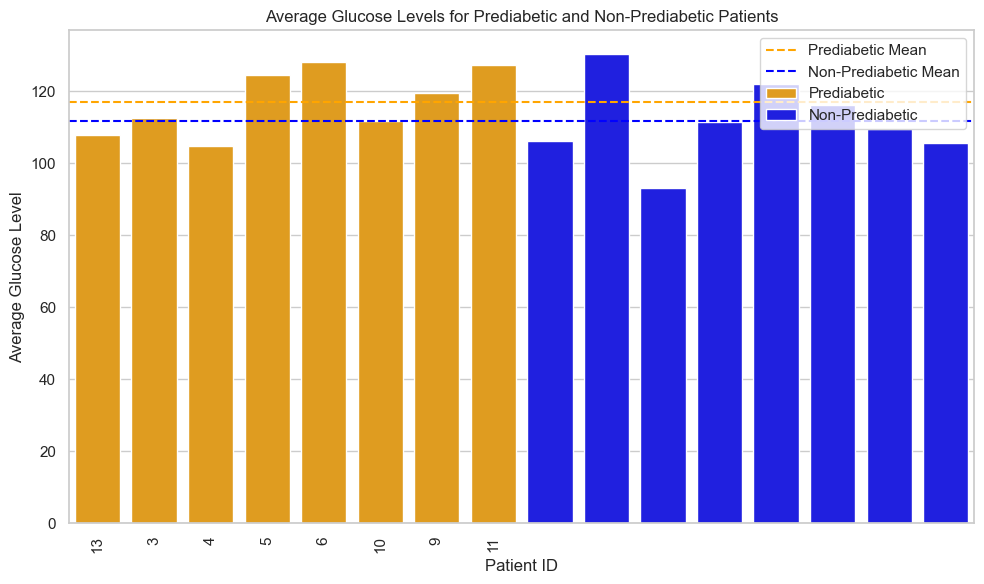

In [40]:
# graph the prediabetic and non-prediabetic patients with 2 lines representing the means of the two groups
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# set the style of the graph
sns.set(style="whitegrid")
# create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
# plot the average glucose levels for prediabetic and non-prediabetic patients
# plot constant lines for the means of each group
ax.axhline(prediabetic_df['Average Glucose'].mean(), color='orange', linestyle='--', label='Prediabetic Mean')
ax.axhline(non_prediabetic_df['Average Glucose'].mean(), color='blue', linestyle='--', label='Non-Prediabetic Mean')
# create a bar plot of the average glucose levels for prediabetic and non-prediabetic patients
sns.barplot(x='ID', y='Average Glucose', data=prediabetic_df, color='orange', label='Prediabetic')
sns.barplot(x='ID', y='Average Glucose', data=non_prediabetic_df, color='blue', label='Non-Prediabetic')
# set the title and labels
ax.set_title('Average Glucose Levels for Prediabetic and Non-Prediabetic Patients')
ax.set_xlabel('Patient ID')
ax.set_ylabel('Average Glucose Level')
# set the x-axis ticks to be the patient IDs
ax.set_xticks(range(len(prediabetic_df)))
ax.set_xticklabels(prediabetic_df['ID'], rotation=90)
# add a legend
ax.legend()
# show the plot
plt.tight_layout()
plt.show()

In [ ]:
# plot the male and female groups with 2 lines representing the means of the two groups
# create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
# plot the average glucose levels for
# plot constant lines for the means of each group
ax.axhline(prediabetic_df['male_df'].mean(), color='orange', linestyle='--', label='Male Mean')
ax.axhline(non_prediabetic_df['female'].mean(), color='blue', linestyle='--', label='Female Mean')